In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardetection/README.dataset.txt
/kaggle/input/cardetection/README.roboflow.txt
/kaggle/input/cardetection/data.yaml
/kaggle/input/cardetection/valid/labels/000825_jpg.rf.5217db7b554510a418092e5f2aa43864.txt
/kaggle/input/cardetection/valid/labels/001638_JPG_jpg.rf.2a3d2a331eb8c9bf6afc868c6da103c8.txt
/kaggle/input/cardetection/valid/labels/road672_png.rf.399722f8bd34dc5991633bbbe681cc47.txt
/kaggle/input/cardetection/valid/labels/00004_00037_00010_png.rf.2d548b82f656367528a9b69d5b6b82cf.txt
/kaggle/input/cardetection/valid/labels/00014_00009_00012_png.rf.02ffbac072397fe4f36979ba80f74fb9.txt
/kaggle/input/cardetection/valid/labels/00014_00010_00001_png.rf.68c586d3ac58ed9ad2b5b51c2702b4cf.txt
/kaggle/input/cardetection/valid/labels/00000_00003_00002_png.rf.76d9ce9f361d1b20eb1b0d5c4d9356b7.txt
/kaggle/input/cardetection/valid/labels/road359_png.rf.c4125f36b26194a2c30d623150bf73bf.txt
/kaggle/input/cardetection/valid/labels/road785_png.rf.2e31920d3a7a5362662eadaa7fff5085.txt


In [2]:
# Install Essential Libraries
!pip install ultralytics

In [3]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


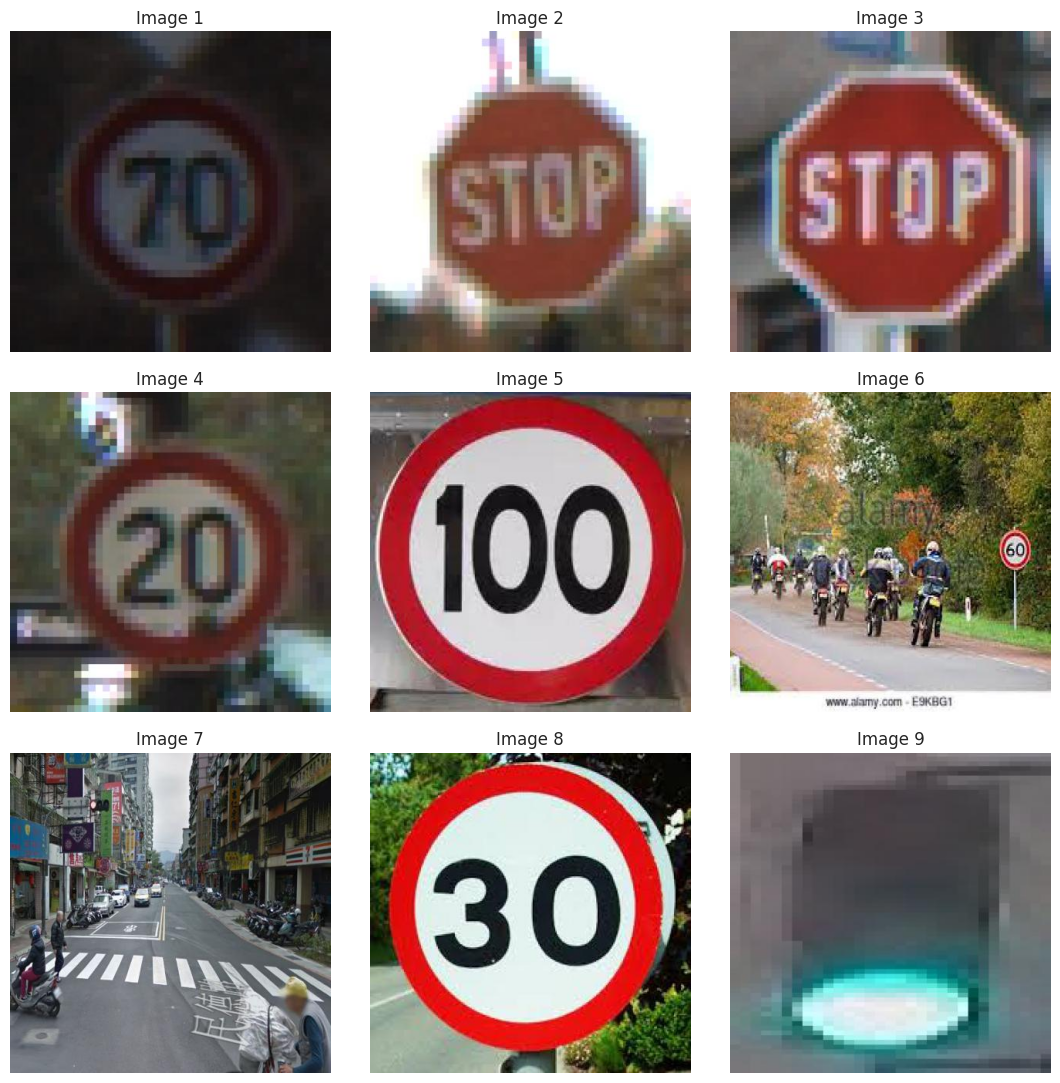

In [4]:
Image_dir = '/kaggle/input/cardetection/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Get the size of the image
image = cv2.imread("/kaggle/input/cardetection/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /kaggle/input/cardetection/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 6.8ms
Speed: 2.9ms preprocess, 6.8ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


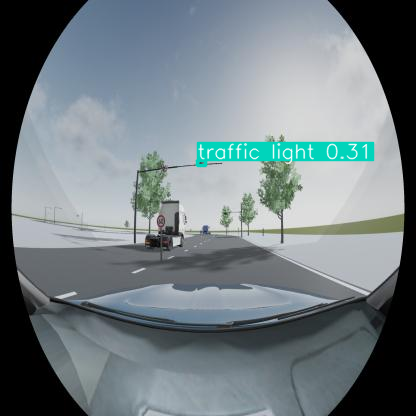

In [6]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/cardetection/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
!pip install -U ipywidgets

In [8]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
#Fine-tuning

# Define hyperparameter grid
batch_sizes = [8, 16, 32, 64]
learning_rates = [0.001, 0.0003, 0.0001]
dropouts = [0.15, 0.25]
optimizers = ['adam', 'sgd', 'auto']

In [10]:
# Iterate through hyperparameter combinations
best_performance = 0
best_hyperparameters = None

for batch_size in batch_sizes:
    for lr in learning_rates:
        for dropout in dropouts:
            for optimizer in optimizers:
                # Train the model with current hyperparameters
                model = YOLO('yolov8n.yaml').load('yolov8n.pt')
                result = model.train(data="/kaggle/input/cardetection/data.yaml", epochs=10, imgsz=416, batch=batch_size, lr0=lr, dropout=dropout, device="0")

                # Evaluate the model
                metrics = model.val(split='test')

                # Track the best hyperparameters
                if metrics.results_dict["metrics/mAP50(B)"] > best_performance:
                    best_performance = metrics.results_dict["metrics/mAP50(B)"]
                    best_hyperparameters = {'batch_size': batch_size, 'lr': lr, 'dropout': dropout, 'optimizer': optimizer}

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

wandb: Currently logged in as: nooolong. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:03<00:00, 987.51it/s] 


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 860.69it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.619G     0.8029      3.289      1.026          2        416: 100%|██████████| 442/442 [00:44<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.31it/s]

                   all        801        944      0.236      0.428      0.262      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.627G     0.7295      2.408     0.9631          2        416: 100%|██████████| 442/442 [00:39<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.86it/s]


                   all        801        944      0.339      0.514      0.398      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.627G     0.6947      1.973     0.9482          3        416: 100%|██████████| 442/442 [00:38<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.60it/s]


                   all        801        944      0.602      0.548      0.595      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.625G     0.6814      1.598     0.9338          2        416: 100%|██████████| 442/442 [00:38<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.61it/s]

                   all        801        944      0.698      0.699      0.726      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.625G       0.66      1.327     0.9258          1        416: 100%|██████████| 442/442 [00:38<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.74it/s]

                   all        801        944      0.713      0.698      0.762      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.623G     0.6379      1.112     0.9152          3        416: 100%|██████████| 442/442 [00:38<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.78it/s]

                   all        801        944      0.772      0.749      0.818      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.638G     0.6222     0.9643     0.9103          4        416: 100%|██████████| 442/442 [00:38<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.89it/s]

                   all        801        944      0.862      0.754      0.834      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.623G     0.5925     0.8564     0.9014          2        416: 100%|██████████| 442/442 [00:38<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.70it/s]

                   all        801        944      0.905      0.762      0.856      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.623G     0.5747     0.7867     0.8945          2        416: 100%|██████████| 442/442 [00:38<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 11.03it/s]

                   all        801        944      0.906      0.784      0.871      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.623G     0.5621     0.7368     0.8866          2        416: 100%|██████████| 442/442 [00:38<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.98it/s]

                   all        801        944        0.9      0.803      0.878       0.76



10 epochs completed in 0.127 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:06<00:00,  7.64it/s]


                   all        801        944      0.902      0.803      0.878      0.761
           Green Light        801        122      0.804      0.573      0.651      0.371
             Red Light        801        108      0.781      0.444      0.596      0.347
       Speed Limit 100        801         52      0.889      0.885       0.94       0.85
       Speed Limit 110        801         17       0.88      0.863      0.916      0.834
       Speed Limit 120        801         60      0.947      0.885      0.965      0.883
        Speed Limit 20        801         56      0.987      0.893      0.964      0.816
        Speed Limit 30        801         74      0.897      0.919      0.959      0.882
        Speed Limit 40        801         55      0.906      0.877       0.94      0.814
        Speed Limit 50        801         71      0.965      0.786      0.909      0.815
        Speed Limit 60        801         76      0.984      0.803      0.894      0.815
        Speed Limit 7

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:02<00:00, 247.49it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 80/80 [00:05<00:00, 15.02it/s]


                   all        638        770      0.905      0.676      0.805      0.692
           Green Light        638        110      0.874      0.567      0.706      0.426
             Red Light        638         94      0.755      0.415      0.573      0.367
        Speed Limit 10        638          3          1          0      0.385      0.273
       Speed Limit 100        638         46      0.902      0.797      0.864      0.762
       Speed Limit 110        638         21       0.82      0.619      0.728      0.644
       Speed Limit 120        638         44      0.951      0.878      0.941      0.843
        Speed Limit 20        638         46      0.984      0.826      0.951      0.846
        Speed Limit 30        638         60      0.851      0.783      0.859      0.788
        Speed Limit 40        638         53      0.889      0.849      0.937      0.815
        Speed Limit 50        638         50      0.932       0.68      0.812      0.741
        Speed Limit 6

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:03<00:00, 981.24it/s] 

train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 896.55it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.753G     0.8029      3.289      1.026          2        416: 100%|██████████| 442/442 [00:43<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  9.90it/s]

                   all        801        944      0.236      0.428      0.262      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.761G     0.7295      2.408     0.9631          2        416: 100%|██████████| 442/442 [00:39<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:04<00:00, 10.27it/s]


                   all        801        944      0.339      0.514      0.398      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.759G     0.6952      2.185     0.9468         11        416:  14%|█▍        | 63/442 [00:05<00:33, 11.38it/s]


KeyboardInterrupt: 

In [12]:
# Train the final model with the best hyperparameters
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')
# final_result = final_model.train(data="/kaggle/input/cardetection/data.yaml", epochs=100, imgsz=416, batch=best_hyperparameters['batch_size'], lr0=best_hyperparameters['lr'], dropout=best_hyperparameters['dropout'], device="0")
# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/cardetection/data.yaml",epochs=100, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = "0")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:03<00:00, 1001.06it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 867.95it/s] 


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.08G     0.8518       3.51      1.099         27        416: 100%|██████████| 56/56 [00:20<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        801        944     0.0582        0.8       0.14      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.31G     0.7141       2.32      1.014         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


                   all        801        944      0.323      0.446        0.3      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.11G     0.7273      1.929      1.003         25        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


                   all        801        944      0.377      0.427      0.373      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.11G     0.7226      1.686     0.9995         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


                   all        801        944      0.585      0.536      0.583      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.11G     0.6729      1.458     0.9782         25        416: 100%|██████████| 56/56 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


                   all        801        944      0.563      0.635      0.621      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.31G     0.6633      1.302     0.9674         34        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


                   all        801        944      0.761      0.638      0.726      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.11G       0.65      1.198     0.9637         23        416: 100%|██████████| 56/56 [00:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944      0.759      0.697      0.763      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.11G     0.6541      1.142     0.9684         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944       0.81      0.634      0.728      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.31G     0.6385      1.077      0.959         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        801        944      0.832      0.746       0.82      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.11G     0.6296      1.006     0.9508         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        801        944      0.788      0.699      0.771      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.11G     0.6259     0.9773     0.9556         20        416: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        801        944      0.841      0.754      0.841      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.11G     0.6205     0.9491     0.9487         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


                   all        801        944      0.867      0.755      0.839      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.11G     0.6236     0.9078      0.948         35        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        801        944      0.906      0.772       0.86      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.11G     0.6021      0.861     0.9426         25        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.898        0.8      0.864      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.11G        0.6     0.8394     0.9433         19        416: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.896      0.757      0.846      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.11G     0.6017     0.8174     0.9439         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.909      0.784      0.872      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.31G     0.5939     0.7882     0.9419         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        801        944      0.913      0.813      0.882      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.31G     0.5941     0.7906     0.9367         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.889      0.773      0.862      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.11G     0.5801     0.7674     0.9369         23        416: 100%|██████████| 56/56 [00:18<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        801        944      0.914      0.827      0.895      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.31G     0.5919     0.7724     0.9404         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.915      0.793      0.872      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.11G     0.5953     0.7582     0.9354         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


                   all        801        944       0.94       0.82      0.901      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.11G     0.5697     0.7098     0.9345         17        416: 100%|██████████| 56/56 [00:18<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.933      0.822      0.892      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.11G     0.5759     0.7357     0.9376         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        801        944      0.927      0.826      0.891      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.11G     0.5698     0.6994     0.9276         25        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944        0.9      0.814      0.882      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.31G     0.5651     0.6995     0.9287         33        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


                   all        801        944      0.915      0.825      0.894      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.11G     0.5616     0.6922     0.9251         25        416: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944      0.894      0.827      0.882      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.11G     0.5635     0.6875     0.9322         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


                   all        801        944      0.919      0.841      0.901      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.31G     0.5724     0.6717     0.9311         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        801        944      0.949      0.815      0.902      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.11G     0.5644     0.6548     0.9266         25        416: 100%|██████████| 56/56 [00:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.915      0.843      0.904      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.11G     0.5506     0.6529     0.9277         14        416: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        801        944      0.946      0.831      0.899      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.11G     0.5513     0.6517     0.9249         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.927      0.818      0.901       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.11G     0.5526     0.6443     0.9273         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        801        944      0.909       0.85      0.906      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.11G     0.5522     0.6379     0.9214         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


                   all        801        944      0.919      0.841       0.91      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.11G     0.5521     0.6273     0.9223         18        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944       0.93      0.845      0.913      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.11G     0.5347     0.6066     0.9225         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


                   all        801        944      0.917      0.838      0.904      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.11G     0.5402     0.6198     0.9186         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944      0.943      0.822      0.903      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.11G     0.5368     0.6174     0.9215         12        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        801        944       0.95      0.833       0.91      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.11G      0.544      0.602       0.92         24        416: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944      0.934      0.848      0.909      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.31G     0.5335     0.5912     0.9165         13        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.955      0.852      0.918      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.11G     0.5364     0.6109      0.921         12        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        801        944       0.96      0.835      0.915      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.31G     0.5374     0.5896     0.9207         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        801        944      0.954      0.836      0.916      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.11G     0.5234     0.5682     0.9105         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        801        944      0.943      0.824       0.91      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.11G     0.5283     0.5872     0.9164         14        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        801        944      0.931      0.854       0.92      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.11G      0.526     0.5804     0.9211         21        416: 100%|██████████| 56/56 [00:18<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        801        944      0.948      0.838       0.92      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.11G     0.5194     0.5715     0.9153         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944      0.945      0.859      0.923      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.11G     0.5252     0.5744     0.9164         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944      0.934      0.842      0.914       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.11G     0.5238     0.5751      0.914         17        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944      0.931      0.871      0.922      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.11G     0.5175     0.5481     0.9132         24        416: 100%|██████████| 56/56 [00:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944      0.949      0.861      0.923      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.11G     0.5246      0.552     0.9143         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        801        944      0.938      0.861       0.92      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.11G     0.5169     0.5517     0.9145         17        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        801        944      0.949      0.866      0.921      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.11G     0.5131     0.5407     0.9139         18        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        801        944      0.913      0.876      0.922      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.11G     0.5109      0.539     0.9147         24        416: 100%|██████████| 56/56 [00:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.962      0.847      0.924      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.11G     0.5123     0.5327     0.9119         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


                   all        801        944       0.94      0.863      0.922      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.11G      0.498     0.5264     0.9085         29        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        801        944       0.93      0.872      0.922      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.11G      0.496     0.5293       0.91         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        801        944      0.924      0.876      0.925      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.31G     0.5089     0.5323      0.912         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


                   all        801        944      0.937      0.875      0.926      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.11G     0.5085     0.5217     0.9097         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944      0.949      0.869      0.925      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.11G     0.5106     0.5276     0.9106         14        416: 100%|██████████| 56/56 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        801        944      0.968      0.852      0.929      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.11G     0.4982     0.5101     0.9088         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.928      0.883      0.931      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.11G     0.4978     0.5066     0.9106         14        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944       0.95      0.864      0.929      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.11G     0.4891     0.4936     0.9088         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        801        944      0.956       0.86       0.93      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.11G     0.4944     0.5008     0.9083         20        416: 100%|██████████| 56/56 [00:18<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944      0.957      0.868      0.929      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.11G     0.4913     0.4867     0.9051         23        416: 100%|██████████| 56/56 [00:18<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        801        944      0.962      0.851      0.929       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.11G     0.5036     0.5009      0.906         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.944      0.867      0.935      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.11G     0.4867     0.4959     0.9062         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        801        944      0.955      0.859      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.31G     0.4916      0.502     0.9084         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        801        944      0.922      0.901      0.937      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.11G     0.4942     0.4917     0.9041         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944      0.937      0.888      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.11G      0.483     0.4881     0.9055         22        416: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944      0.951      0.885      0.938      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.11G     0.4886      0.488     0.9054         21        416: 100%|██████████| 56/56 [00:18<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.955      0.869      0.931      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.11G     0.4852     0.4785     0.9047         18        416: 100%|██████████| 56/56 [00:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944      0.952      0.866      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.11G     0.4841     0.4707     0.9025         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944      0.951      0.881      0.935      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.11G     0.4688     0.4557     0.8997         28        416: 100%|██████████| 56/56 [00:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.924      0.898      0.934      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.11G     0.4732     0.4524      0.901         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        801        944      0.934      0.892      0.934      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.11G     0.4684     0.4603     0.8981         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.929      0.897      0.931      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.11G     0.4734     0.4601     0.9031         18        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        801        944      0.938      0.867      0.932      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.11G     0.4758      0.452     0.9031         14        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


                   all        801        944      0.938       0.88      0.935      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.11G     0.4745     0.4547     0.9028         31        416: 100%|██████████| 56/56 [00:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        801        944      0.945      0.869      0.932      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.11G     0.4714     0.4521     0.9008         32        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        801        944      0.944       0.89      0.932      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.11G     0.4656     0.4501     0.8981         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        801        944      0.937      0.886      0.936      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.31G     0.4691     0.4462     0.9011         15        416: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.924      0.896      0.932       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.11G      0.466     0.4429     0.8969         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        801        944      0.921      0.892      0.932      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.11G     0.4585     0.4374     0.8995         29        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        801        944      0.938      0.897      0.937      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.11G     0.4583     0.4345     0.8948         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        801        944      0.944      0.896      0.941      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.11G     0.4667     0.4302     0.8977         22        416: 100%|██████████| 56/56 [00:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        801        944      0.941      0.887      0.943      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.11G      0.456     0.4248     0.8952         28        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.931      0.885      0.935      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.11G     0.4546     0.4269      0.893         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        801        944      0.941      0.875      0.936      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.11G     0.4504     0.4236     0.8955         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.936      0.887      0.936      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.31G     0.4601     0.4325     0.8979         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944      0.942      0.892      0.937      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.31G     0.4483     0.4143     0.8945         28        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944       0.95      0.884      0.939      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       4.1G      0.446     0.4034     0.8922         33        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        801        944      0.958      0.881      0.941      0.821


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.18G     0.4515     0.2762     0.8438         12        416: 100%|██████████| 56/56 [00:19<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


                   all        801        944       0.93      0.896      0.938       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.11G      0.437     0.2697     0.8458         12        416: 100%|██████████| 56/56 [00:16<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.946      0.879      0.936      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.11G     0.4461      0.271     0.8437         12        416: 100%|██████████| 56/56 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        801        944      0.955      0.887      0.941      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.11G     0.4368     0.2632     0.8468         11        416: 100%|██████████| 56/56 [00:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


                   all        801        944      0.949      0.886      0.941      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.11G     0.4332     0.2582     0.8377         10        416: 100%|██████████| 56/56 [00:16<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        801        944      0.946      0.893      0.941      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.11G     0.4331     0.2585     0.8414         14        416: 100%|██████████| 56/56 [00:16<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        801        944      0.933      0.907      0.942      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.11G     0.4293     0.2556     0.8365         12        416: 100%|██████████| 56/56 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.939      0.901      0.942      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.11G     0.4267     0.2588     0.8424         10        416: 100%|██████████| 56/56 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.936      0.903      0.941      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.11G     0.4214     0.2507     0.8356         12        416: 100%|██████████| 56/56 [00:16<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944      0.942      0.896       0.94      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.11G     0.4188     0.2498     0.8407         10        416: 100%|██████████| 56/56 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.941      0.898       0.94      0.824



100 epochs completed in 0.640 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


                   all        801        944      0.941      0.887      0.943      0.825
           Green Light        801        122      0.876      0.636      0.782       0.48
             Red Light        801        108      0.833        0.6      0.744       0.45
       Speed Limit 100        801         52      0.917      0.942      0.987      0.894
       Speed Limit 110        801         17       0.84          1       0.99      0.922
       Speed Limit 120        801         60      0.947      0.983      0.993      0.919
        Speed Limit 20        801         56      0.992      0.964      0.994      0.884
        Speed Limit 30        801         74      0.986      0.945      0.987      0.932
        Speed Limit 40        801         55      0.982       0.98      0.993      0.891
        Speed Limit 50        801         71          1      0.865      0.956      0.854
        Speed Limit 60        801         76      0.933      0.921       0.95      0.874
        Speed Limit 7

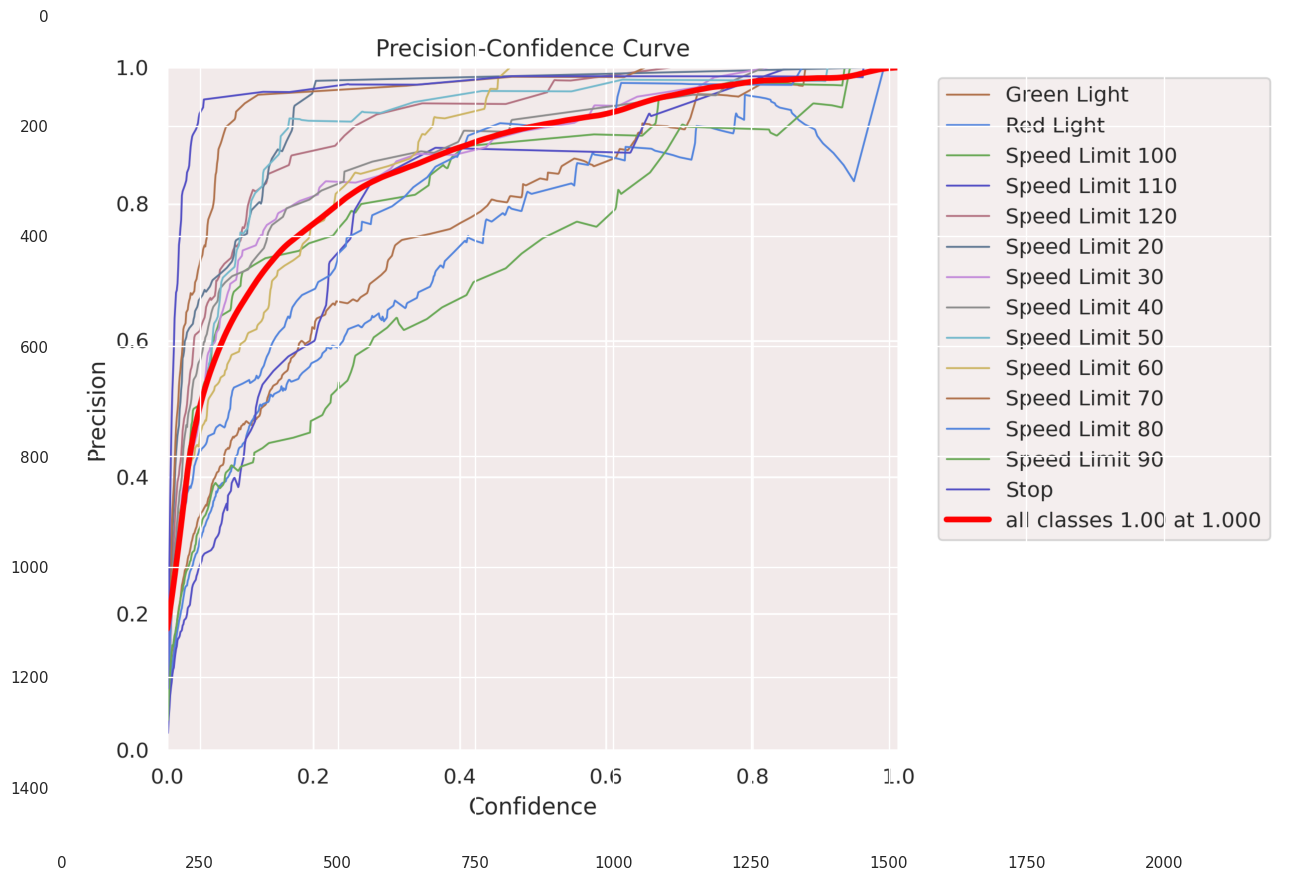

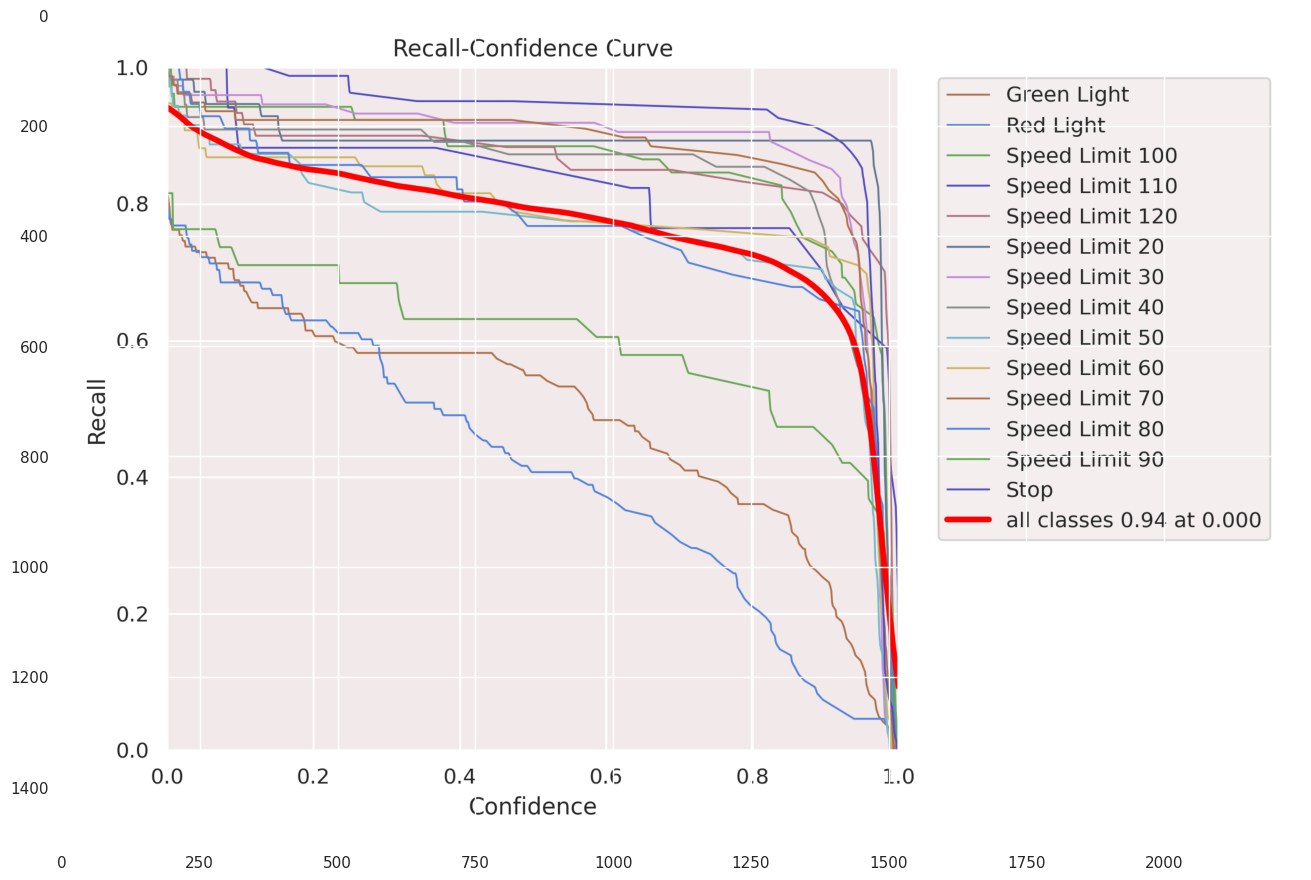

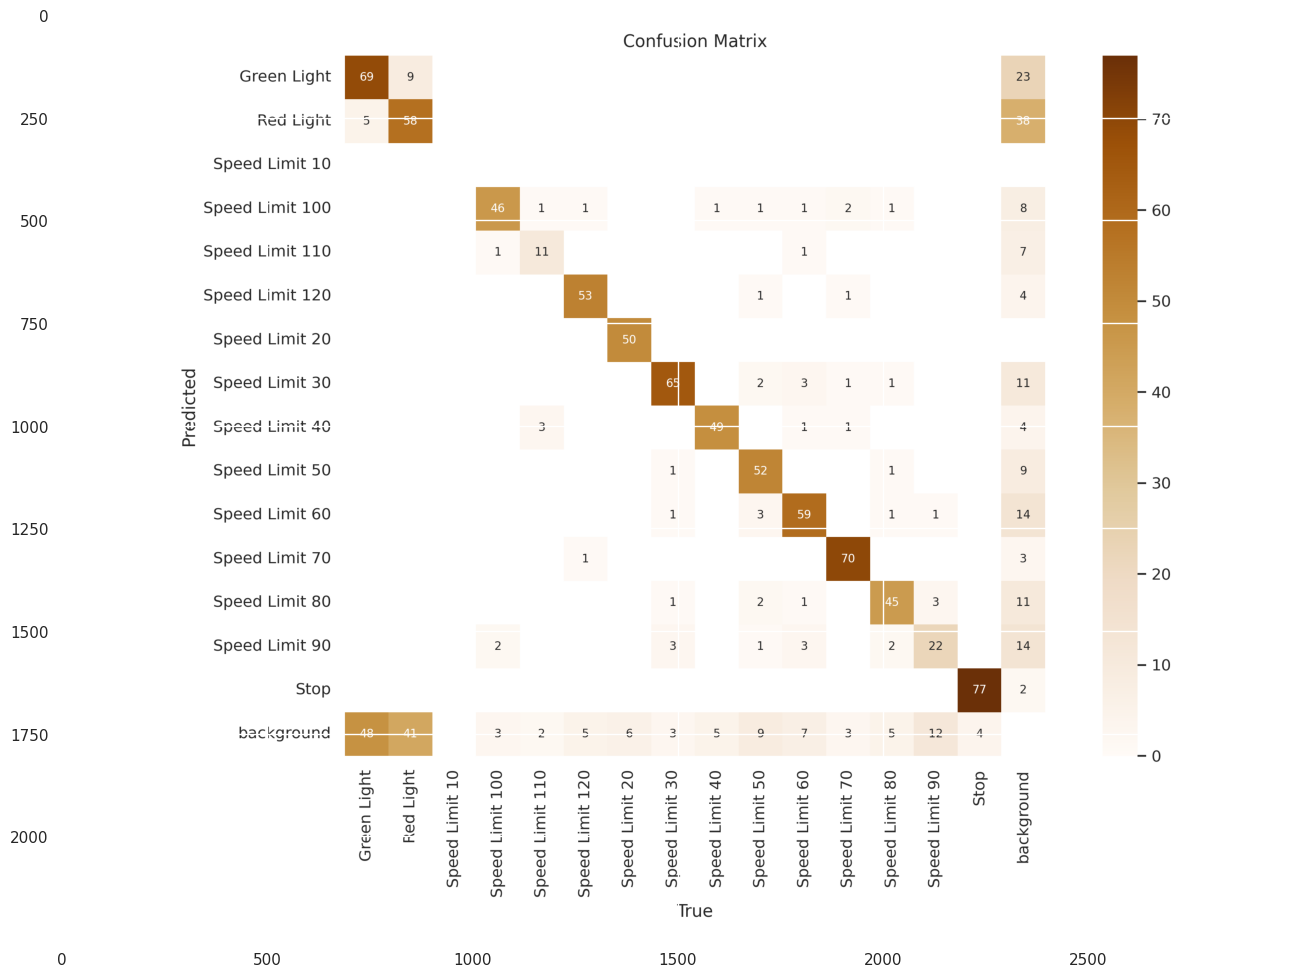

In [13]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [14]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
0                        1                  0.80286                  3.28850   
1                        2                  0.72953                  2.40800   
2                        3                  0.69466                  1.97290   
3                        4                  0.68143                  1.59750   
4                        5                  0.65998                  1.32720   
5                        6                  0.63793                  1.11150   
6                        7                  0.62219                  0.96433   
7                        8                  0.59255                  0.85641   
8                        9                  0.57467                  0.78669   
9                       10                  0.56211                  0.73684   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                  1.02630                  0.23626                  0.42820   
1                  0.96305                  0.33883                  0.51438   
2                  0.94824                  0.60199                  0.54837   
3                  0.93376                  0.69759                  0.69896   
4                  0.92583                  0.71322                  0.69813   
5                  0.91519                  0.77187                  0.74930   
6                  0.91029                  0.86246                  0.75361   
7                  0.90140                  0.90498                  0.76233   
8                  0.89448                  0.90602                  0.78386   
9                  0.88664                  0.90021                  0.80332   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.26154                  0.21153                  0.76206   
1                  0.39798                  0.32559                  0.75561   
2                  0.59537                  0.49381                  0.75738   
3                  0.72642                  0.61834                  0.71209   
4                  0.76166                  0.64455                  0.69990   
5                  0.81804                  0.69861                  0.66980   
6                  0.83353                  0.71694                  0.64714   
7                  0.85609                  0.73328                  0.63074   
8                  0.87086                  0.75243                  0.61737   
9                  0.87772                  0.76045                  0.60897   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                  2.29670                  0.97534                 0.000175   
1                  1.92730                  0.95291                 0.000316   
2                  1.55310                  0.96552                 0.000422   
3                  1.28420                  0.94246                 0.000370   
4                  1.10890                  0.93614                 0.000370   
5                  0.90134                  0.91901                 0.000318   
6                  0.77759                  0.91513                 0.000266   
7                  0.68495                  0.89633                 0.000214   
8                  0.63860                  0.89703                 0.000161   
9                  0.58900                  0.89463                 0.000109   

                    lr/pg1                   lr/pg2  
0                 0.000175                 0.000175  
1                 0.000316                 0.000316  
2                 0.000422                 0.000422  
3                 0.000370                 0.000370  
4                 0.000370                 0.000370  
5                 0.000318                 0.000318  
6                 0.000266                 0.000266  
7                 0.000214                 0.000214  
8          

In [15]:
import pandas as pd
df = pd.DataFrame(Result_Final_model)
df.head()

epoch           train/box_loss           train/cls_loss  \
0                        1                  0.80286                   3.2885   
1                        2                  0.72953                   2.4080   
2                        3                  0.69466                   1.9729   
3                        4                  0.68143                   1.5975   
4                        5                  0.65998                   1.3272   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                  1.02630                  0.23626                  0.42820   
1                  0.96305                  0.33883                  0.51438   
2                  0.94824                  0.60199                  0.54837   
3                  0.93376                  0.69759                  0.69896   
4                  0.92583                  0.71322                  0.69813   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.26154                  0.21153                  0.76206   
1                  0.39798                  0.32559                  0.75561   
2                  0.59537                  0.49381                  0.75738   
3                  0.72642                  0.61834                  0.71209   
4                  0.76166                  0.64455                  0.69990   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   2.2967                  0.97534                 0.000175   
1                   1.9273                  0.95291                 0.000316   
2                   1.5531                  0.96552                 0.000422   
3                   1.2842                  0.94246                 0.000370   
4                   1.1089                  0.93614                 0.000370   

                    lr/pg1                   lr/pg2  
0                 0.000175                 0.000175  
1                 0.000316                 0.000316  
2                 0.000422                 0.000422  
3                 0.000370                 0.000370  
4                 0.000370                 0.000370

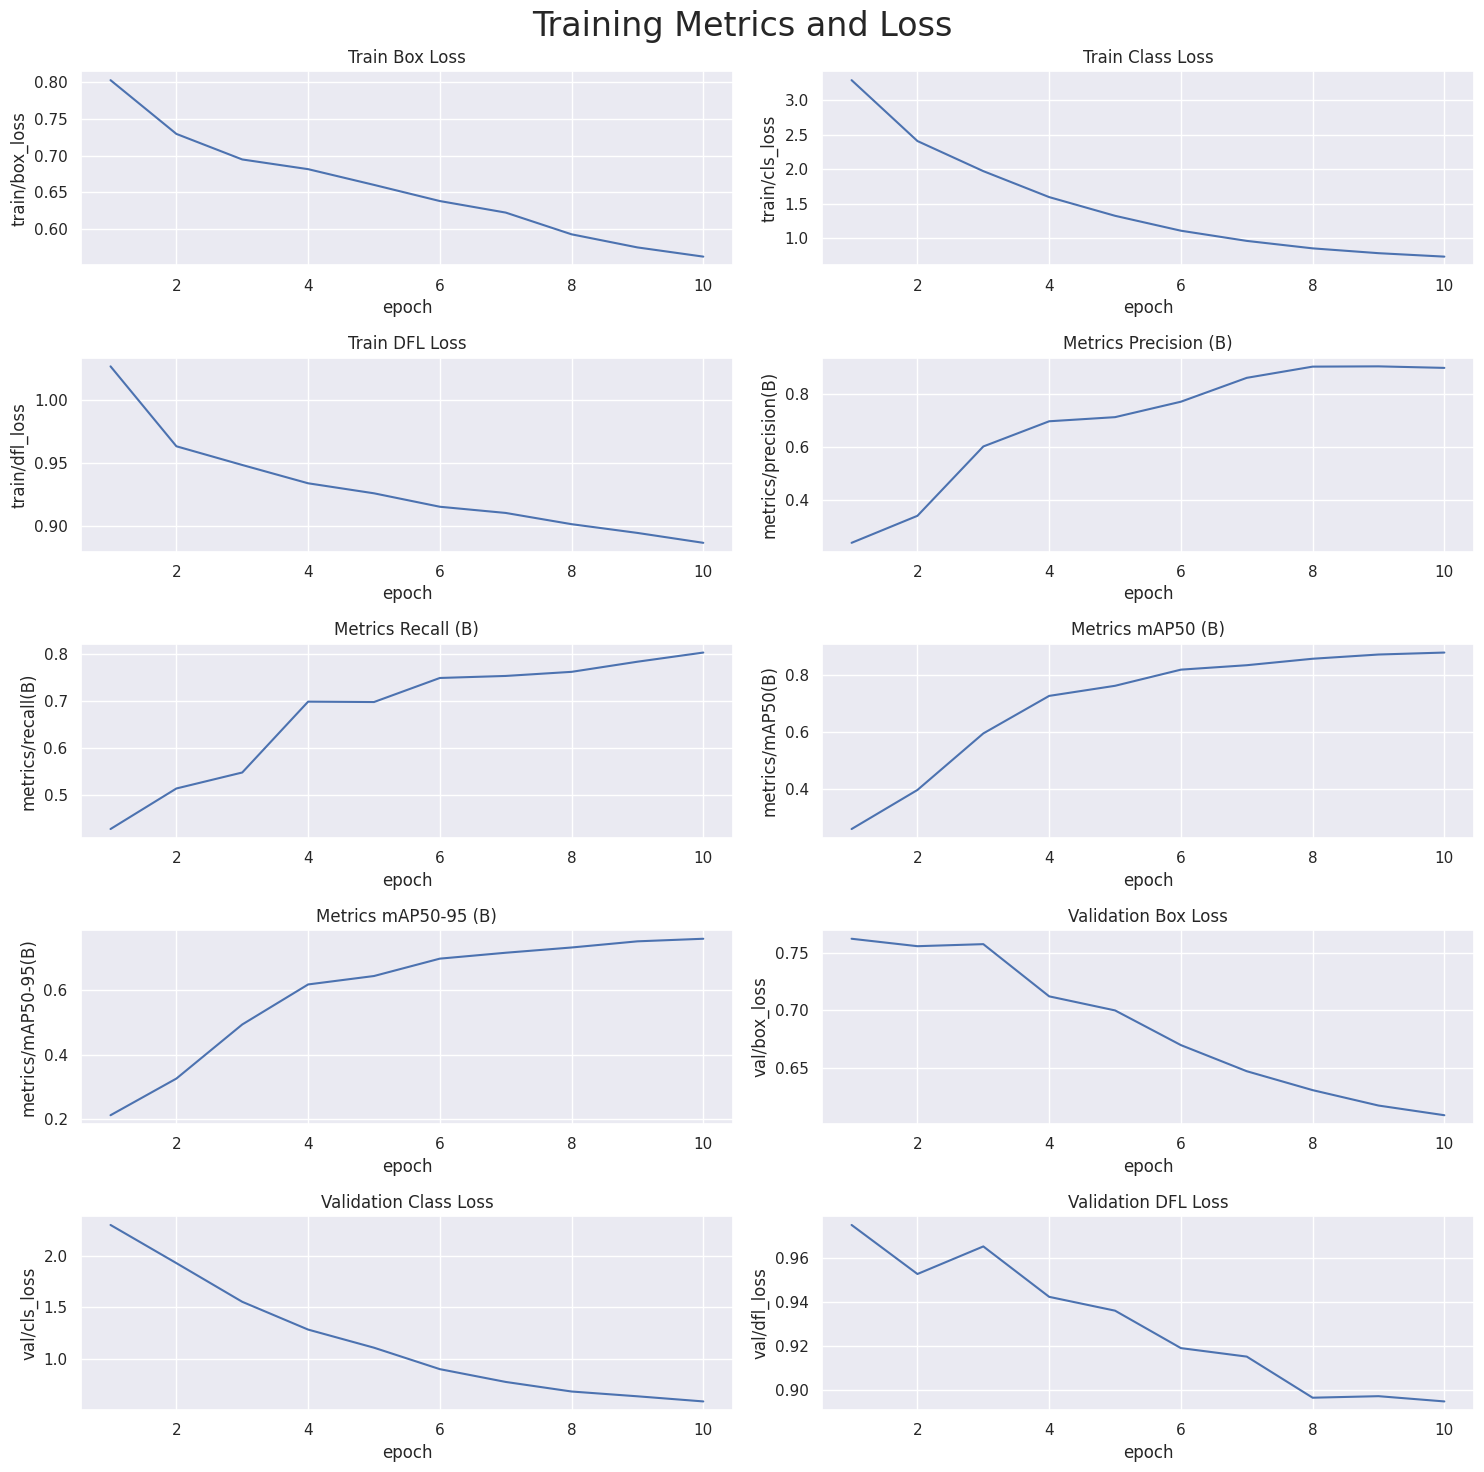

In [16]:
df.columns = df.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()


In [17]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<00:00, 656.23it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:05<00:00,  7.07it/s]


                   all        638        770      0.905      0.676      0.805      0.692
           Green Light        638        110      0.874      0.567      0.706      0.426
             Red Light        638         94      0.755      0.415      0.573      0.367
        Speed Limit 10        638          3          1          0      0.385      0.273
       Speed Limit 100        638         46      0.902      0.797      0.864      0.762
       Speed Limit 110        638         21       0.82      0.619      0.728      0.644
       Speed Limit 120        638         44      0.951      0.878      0.941      0.843
        Speed Limit 20        638         46      0.984      0.826      0.951      0.846
        Speed Limit 30        638         60      0.851      0.783      0.859      0.788
        Speed Limit 40        638         53      0.889      0.849      0.937      0.815
        Speed Limit 50        638         50      0.932       0.68      0.812      0.741
        Speed Limit 6

In [18]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9053207683891148
metrics/recall(B):  0.6760059868809475
metrics/mAP50(B):  0.804928920803651
metrics/mAP50-95(B):  0.691504766889679


In [19]:
# Path to the directory containing the images
image_dir = '/kaggle/input/cardetection/test/images'  

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 Green Light, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train102

0: 416x416 2 Green Lights, 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train103

0: 416x416 1 Speed Limit 20, 6.2ms
Speed: 1.5ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train104

0: 416x416 1 Speed Limit 80, 6.2ms
Speed: 1.0ms preprocess, 6.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train105

0: 416x416 2 Green Lights, 6.2ms
Speed: 1.0ms preprocess, 6.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train106

0: 416x416 1 Speed Limit 80, 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/det

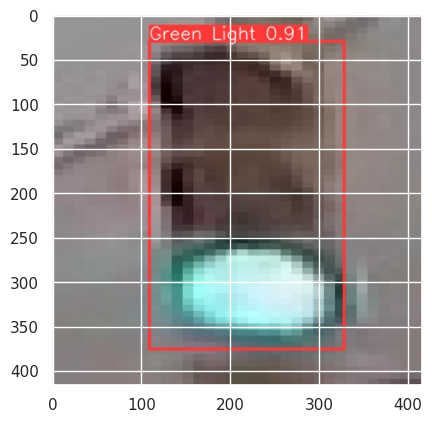

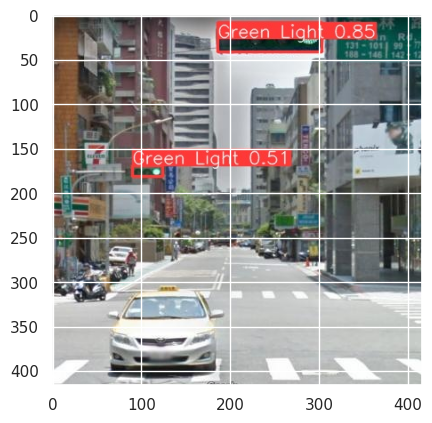

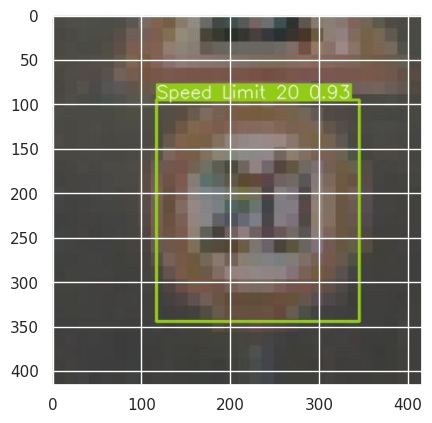

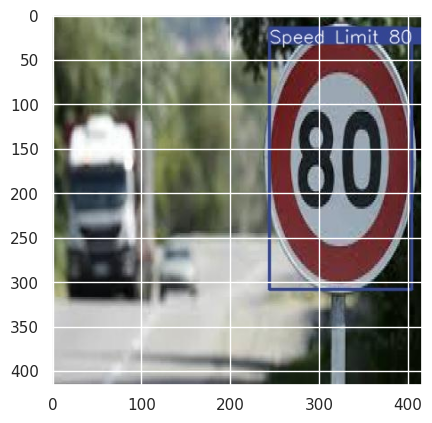

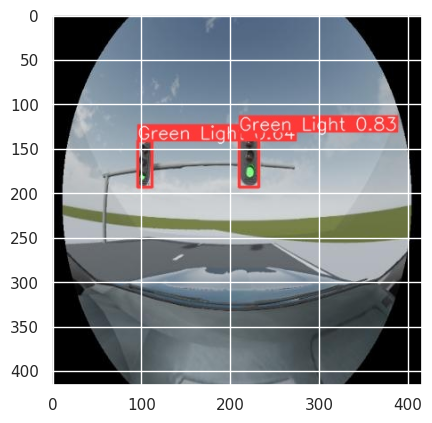

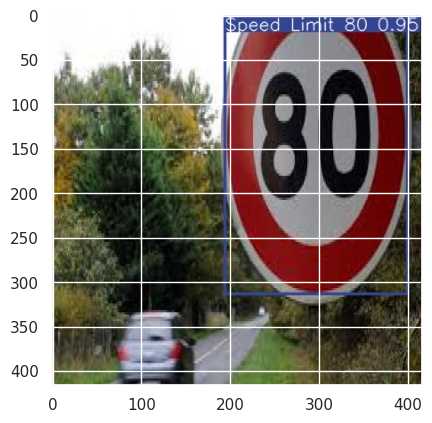

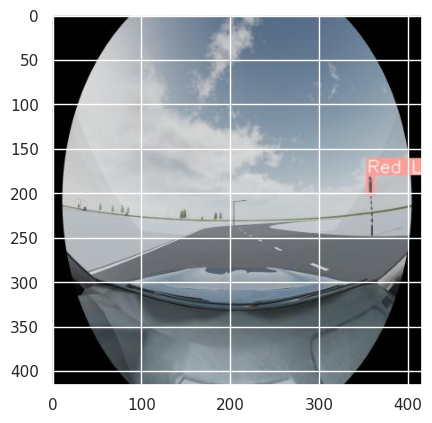

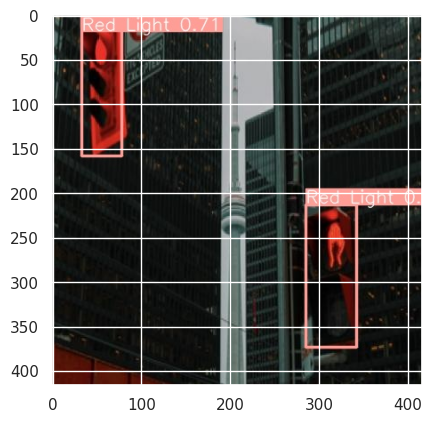

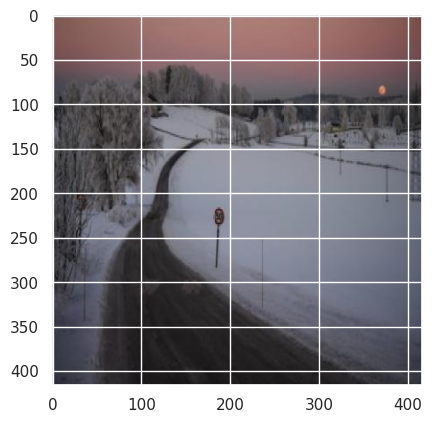

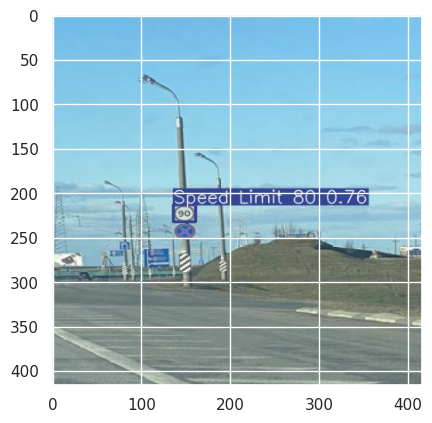

In [25]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/kaggle/working/runs/detect/train10{i}/image0.jpg'))
    plt.show()

In [26]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /kaggle/input/traffic-signs-dataset-in-yolo-format/traffic-sign-to-test.mp4 output.mp4

# Display the video
Video("output.mp4", width=960)

In [27]:
# Load a pr-trained model
video_model = YOLO("yolov8n.pt")

# Use the model to detect signs
video_model.predict(source="/kaggle/input/traffic-signs-dataset-in-yolo-format/traffic-sign-to-test.mp4", show=True, save = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/56) /kaggle/input/traffic-signs-dataset-in-yolo-format/traffic-sign-to-test.mp4: 384x640 (no detections), 68.7ms
video 1/1 (2/56) /kaggle/input/traffic-signs-dataset-in-yolo-format/traffic-sign-to-test.mp4: 384x640 (no detections), 8.1ms
video 1/1 (3/56) /kaggle/input/traffic-signs-dataset-in-yolo-format/traffic-sign-to-test.mp4: 384x640 1 stop sign, 7.1ms
video 1/1 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [28]:
# Export the model
from IPython.display import Video
video_model.export(format='onnx')

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 0.9s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (2.4s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.onnx'

In [29]:
# show result
# Convert format
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict/traffic-sign-to-test.avi result_out1.mp4

# Display the video 
Video("result_out1.mp4", width=960)

In [30]:
# Load a pr-trained model
video_model2 = YOLO("yolov8n.pt")

# Use the model to detect signs
video_model2.predict(source="/kaggle/input/traffic/input.mp4", show=True, save = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/508) /kaggle/input/traffic/input.mp4: 640x640 1 stop sign, 6.3ms
video 1/1 (2/508) /kaggle/input/traffic/input.mp4: 640x640 1 stop sign, 6.7ms
video 1/1 (3/508) /kaggle/input/traffic/input.mp4: 640x640 1 stop sign, 6.5ms
video 1/1 (4/508) /kaggle/input/traffic/input.mp4: 640x640 1 traffic light, 6.7ms
video 1/1 (5/508) /kaggle/input/traffic/input.mp4: 640x640 1 stop 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [31]:
# Export the model
video_model2.export(format='onnx')

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 0.9s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (2.3s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.onnx'

In [32]:
# show result
# Convert format
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict2/input.avi result_out.mp4

# Display the video 
Video("result_out.mp4", width=960)